X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


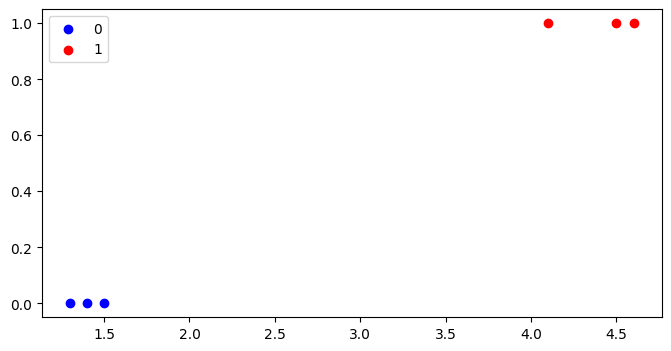

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

In [2]:
N = 6
k = 2

# one_hot
import numpy as np

def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [12]:
# some parameters
learning_rate = 0.1
losses = []
max_epoch = 1

# initialize parameters
theta = np.array([[0.1, 0.05], 
                  [0.2, -0.1]])
print('theta:\n', theta)

for epoch in range(max_epoch):
    # compute z
    z = X.dot(theta)    

    # compute y_hat
    exp_z = np.exp(z)    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    print(f'loss: {np.sum(loss)/6}')
    losses.append(np.sum(loss))

    # compute the gradient dz
    dz = y_hat - y_one_hot

    # compute dtheta
    dtheta = X.T.dot(dz)

    # update
    theta = theta - learning_rate*dtheta

print(theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]
loss: 1.0411729169458368
[[-0.02376371  0.17376371]
 [-0.69155806  0.79155806]]


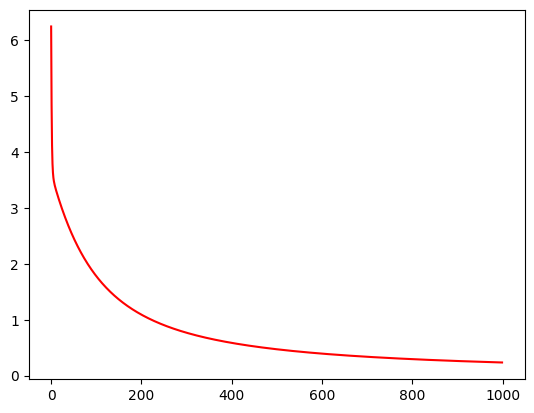

In [11]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [12]:
print(theta)

[[ 3.08858244 -2.93858244]
 [-1.08487655  1.18487655]]


In [13]:
z = X.dot(theta)    
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[0.94529338 0.05470662]
 [0.95591232 0.04408768]
 [0.9322979  0.0677021 ]
 [0.01496852 0.98503148]
 [0.03630488 0.96369512]
 [0.01196539 0.98803461]]


In [14]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1]
